# What are the most demanded skills for the top 3 most popular data roles?

## Methodology:

1. Clean-up skill column
2. Calculate skills count based on the column "job_title_short"
3. Calculate skill percent
4. Plot final findings 

In [2]:
#Import libraries
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load the data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US = df[df['job_country' ]== 'United States']

In [8]:
df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name = 'skill_count')

df_skills_count.sort_values(by= 'skill_count', ascending= False, inplace = True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
553,gdpr,Software Engineer,1
554,ggplot2,Business Analyst,1
1843,wrike,Business Analyst,1
1839,workfront,Data Engineer,1


In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

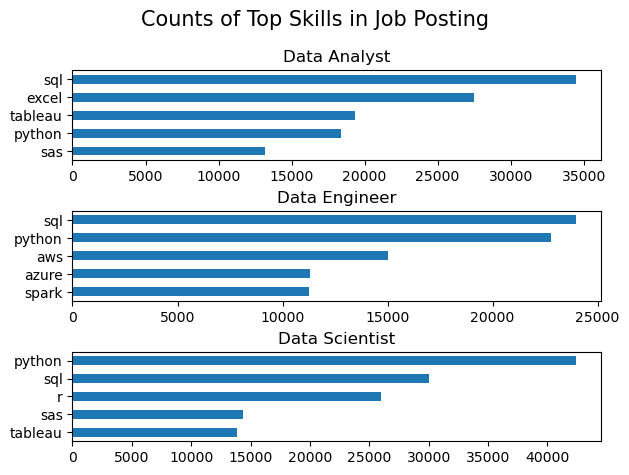

In [22]:
fig, ax = plt.subplots(len(job_titles), 1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x='job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize= 15)
fig.tight_layout(h_pad=0.5)
plt.show()



In [26]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name= 'jobs_total')


df_job_skills_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on ='job_title_short')

df_job_skills_perc['skill_percent'] = 100* df_job_skills_perc['skill_count'] / df_job_skills_perc['jobs_total']

df_job_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,gdpr,Software Engineer,1,1814,0.055127
1866,ggplot2,Business Analyst,1,7382,0.013546
1867,wrike,Business Analyst,1,7382,0.013546
1868,workfront,Data Engineer,1,35080,0.002851


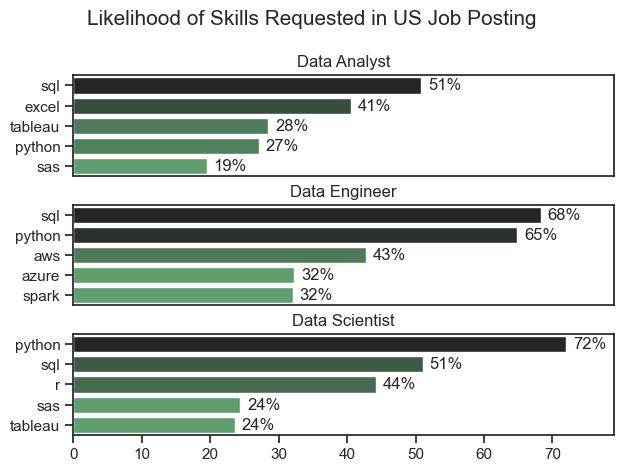

In [39]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style= 'ticks')

for i , job_title in enumerate(job_titles):
    df_plot = df_job_skills_perc[df_job_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax= ax[i], hue = 'skill_count', palette= 'dark:g_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_xlim(0, 79)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v +1 , n , f'{v:.0f}%' , va = 'center')
    if i != len(job_titles) -1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Posting', fontsize= 15)
fig.tight_layout(h_pad=0.5)
plt.show()
